In [19]:
import pandas as pd
df=pd.read_csv('clean-january.csv',nrows=100)
df.head()
#Any general code that you want to reuse in the following answers, we have picked 100 records

,pickup_datetime,dropoff_datetime,trip_distance,passenger_count,payment_amount,duration
0,1/01/16 0:00,1/01/16 0:13,1.50,1,14.65,13
1,1/01/16 0:01,1/01/16 0:07,1.40,2,10.75,6
2,1/01/16 0:02,1/01/16 0:08,1.02,1,8.76,6
3,1/01/16 0:03,1/01/16 0:15,4.00,1,18.95,12
4,1/01/16 0:04,1/01/16 0:22,3.53,1,16.80,18


In [4]:
def createcolumn(row):
    if row['trip_distance'] < 3:
        return 1
    else:
        return 0
df['short_trip']=df.apply(createcolumn,axis=1)
df.head()
per=df.loc[df['short_trip']==1]['short_trip'].count()/df['short_trip'].count()*100
print("% of short trips is :",round(per,1))
#Answer to 1

% of short trips is : 64.0


In [5]:
print("STAT")
tripd_median= df['trip_distance'].median()
print("January:",round(tripd_median,1))
duration_median1=df['duration'].median()
print("January:",round(duration_median1,1))#Answer to 2

STAT
January: 2.1
January: 11.5


In [6]:
per = (df.loc[df['trip_distance'] < 1.2].count()+df.loc[df['trip_distance'] > 4.5].count())/df['trip_distance'].count()*100
print(str(round(per['trip_distance'],1)) + "% of instances in ‘tripdistance’ are abnormal! (normal range is between 1.2 and 4.5)")#Answer to 3

32.0% of instances in ‘tripdistance’ are abnormal! (normal range is between 1.2 and 4.5)


In [7]:
import matplotlib.pyplot as plt

df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'],format = '%d/%m/%y %H:%M')
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'],format = '%d/%m/%y %H:%M')
morning = df.loc[(df['pickup_datetime'].dt.hour>=7) & (df['pickup_datetime'].dt.hour<=11)]
afternoon = df.loc[(df['pickup_datetime'].dt.hour>=12) & (df['pickup_datetime'].dt.hour<=15)]


fig = plt.figure()
ax = fig.add_subplot(221)
plt.boxplot(morning['payment_amount'])
plt.title("Morning Trip Fares")
ax = fig.add_subplot(222)
plt.boxplot(afternoon['payment_amount'])
plt.title("Afternoon Trip Fares")

plt.show()

#def create_df1(row):
#   pickhour=pickup.hour
#    if pickhour>=7 and pickhour<=11:
#        return 1
#    else:
#        return 0
#df['morning_pickup']=df.apply(create_df1,axis=1)
#df1=df.loc[df['morning_pickup']==1]
#plt.boxplot(df1['payment_amount'])
#plt.title("Morning Trip Fares")
#plt.figure()


##def create_df2(row):
  #  pickup=pd.to_datetime(row['pickup_datetime'])
   # pickhour=pickup.hour
    #if pickhour>=12 and pickhour<=15:
     #   return 1
    #else:
     #   return 0
#df['afternoon_pickup']=df.apply(create_df2,axis=1)
#df2=df.loc[df['afternoon_pickup']==1]
#plt.boxplot(df2['payment_amount'])
#plt.title("Afternoon Trip Fares")
#plt.figure()
#plt.show()




#Answer to 4

In [6]:

#df=pd.read_csv('clean-january.csv',nrows=1200)
def create_isPeak(row):
    pickup=pd.to_datetime(row['pickup_datetime'])
    dropoff=pd.to_datetime(row['dropoff_datetime'])
    if pickup.hour>=7 and pickup.hour<=8 and dropoff.hour>=7 and dropoff.hour<=8:
        return 1
    else:
        return 0
df['isPeak']=df.apply(create_isPeak,axis=1)
per=df.loc[df['isPeak']==1].count()/df['isPeak'].count()*100
print("% of peak hour trips="+str(round(per['isPeak'],1)))
#Answer to 5

% of peak hour trips=7.0


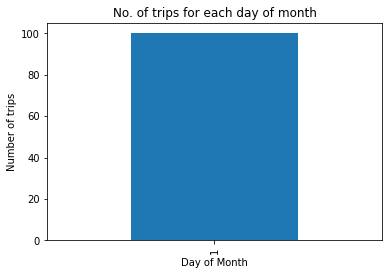

In [8]:
from datetime import datetime

#def create_col(row):
#    trip_date=pd.to_datetime(row['pickup_datetime'])
#    trip_date=trip_date.strftime('%d/%m/%y %H:%M')
#    trip_date=pd.to_datetime(trip_date)
#    tripday=trip_date.day
#    return tripday
df['dayofmonth'] = df['pickup_datetime'].dt.day
#df['dayofmonth']=df.apply(create_col,axis=1)
result=df.groupby(df['dayofmonth'])
result['pickup_datetime'].count().plot(kind='bar')
plt.title("No. of trips for each day of month")
plt.xlabel("Day of Month")
plt.ylabel("Number of trips")
plt.show()
#Answer to 6

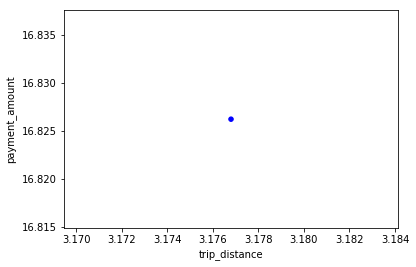

In [9]:
from datetime import datetime
import matplotlib.pyplot as plt
#df=pd.read_csv('clean-january.csv',nrows=5000)
def create_col(row):
    trip_date=pd.to_datetime(row['pickup_datetime'])
    trip_date=trip_date.strftime('%d/%m/%y %H:%M')
    trip_date=pd.to_datetime(trip_date)
    tripday=trip_date.weekday()
    if tripday==0:
        return "Monday"
    elif tripday==1:
        return "Tuesday"
    elif tripday==2:
        return "Wednesday"
    elif tripday==3:
        return "Thursday"
    elif tripday==4:
        return "Friday"
    elif tripday==5:
        return "Saturday"
    elif tripday==6:
        return "Sunday"
df['dayofweek']=df.apply(create_col,axis=1)
res=df.groupby(df['dayofweek'])
res.mean().plot.scatter('trip_distance','payment_amount',c=['b','r'])
plt.show()

#df['dayofweek'] = df['pickup_datetime'].dt.weekday_name
#stats_per_day = df.groupby('dayofweek')['trip_distance','payment_amount'].mean()
#stats_per_day.plot.scatter(y='trip_distance',x='payment_amount',c=['k','b','r','g','c','m','y'])
#label = ['Friday','Monday','Saturday','Sunday','Thursday','Tuesday','Wednesday']
#plt.legend()

#Answer to 7

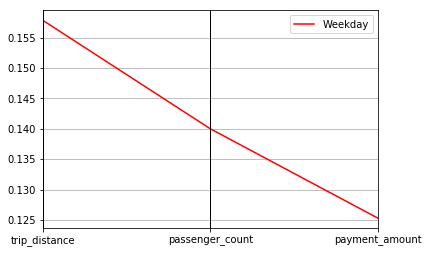

In [10]:
##normalise data

df['trip_distance'] = (df['trip_distance']-df['trip_distance'].min())/(df['trip_distance'].max()-df['trip_distance'].min())
df['passenger_count'] = (df['passenger_count']-df['passenger_count'].min())/(df['passenger_count'].max()-df['passenger_count'].min())
df['payment_amount'] = (df['payment_amount']-df['payment_amount'].min())/(df['payment_amount'].max()-df['payment_amount'].min())

days = df.groupby('dayofweek')['trip_distance','passenger_count','payment_amount'].mean()

days['weekday'] = days.index
days.sort_values(by='payment_amount')

pd.plotting.parallel_coordinates(days,'weekday',color=['r','r','b','b','r','r','r'])


#colors = {'Weekend': 'b', 'Weekday': 'r'}
Weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday']
Weekends = ['Saturday','Sunday']

plt.legend(labels = ['Weekday'])


plt.show()

#Answer to 8

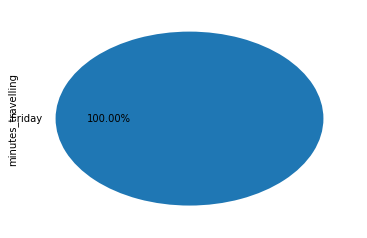

In [11]:
df['minutes_travelling'] = df['passenger_count'] * df['duration']
mean_minutes = df.groupby('dayofweek')['minutes_travelling'].mean()
mean_minutes.plot.pie(autopct='%.2f%%')
#Answer to 9

In [14]:
#Answer to 10
from datetime import datetime
def timeDiff(time1,time2):
    timea=datetime.strptime(time1,"%H:%M")
    timeb=datetime.strptime(time2,"%H:%M")
    newtime=timeb-timea
    return newtime.seconds/60
def create_col(row):
    trip_date=pd.to_datetime(row['pickup_datetime'])
    trip_date=trip_date.strftime('%d/%m/%y %H:%M')
    trip_date=pd.to_datetime(trip_date)
    drop_date=pd.to_datetime(row['dropoff_datetime'])
    drop_date=drop_date.strftime('%d/%m/%y %H:%M')
    drop_date=pd.to_datetime(drop_date)
    if trip_date.day!=drop_date.day:
        return 0
    hr=trip_date.hour
    mn=trip_date.minute
    giventime='0:06'
    actualtime=str(hr)+":"+str(mn)
    diffmin=timeDiff(giventime,actualtime)
    if(diffmin<=60):
        return 1
    else:
        return 0
    
df['is60mintrip']=df.apply(create_col,axis=1)

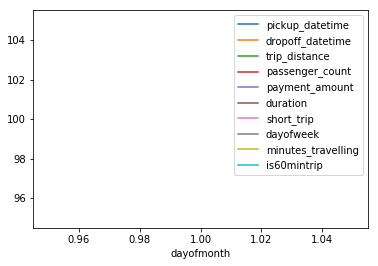

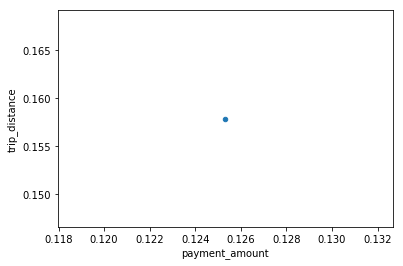

In [15]:
res=df.groupby(df['dayofmonth']).count().plot()
dfmonth=df['dayofmonth']
res=df.groupby('dayofweek')['trip_distance','payment_amount'].mean()
res.plot.scatter(y='trip_distance',x='payment_amount')

plt.show()

